<a href="https://colab.research.google.com/github/toniname/Gist/blob/main/pytonlesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Отримання даних*

In [189]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [190]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Харків")
data_json = response.json()

Створення **DataFrame**

In [191]:
df = pd.DataFrame(data_json["data"])

In [192]:
df.head()

,at,val
0,2022-08-29,784
1,2022-08-30,802
2,2022-08-31,834
3,2022-09-01,828
4,2022-09-02,829


In [193]:
df.shape

(289, 2)

In [194]:
df.columns

Index(['at', 'val'], dtype='object')

In [195]:
df.dtypes

at     object
val     int64
dtype: object

Підготовка даних

In [196]:
df["at"] = pd.to_datetime(df["at"])

In [197]:
df.dtypes

at     datetime64[ns]
val             int64
dtype: object

In [198]:
df = df.rename(columns = {"at": "Дата", "val": "Вакансії"})

In [199]:
df.head()

,Дата,Вакансії
0,2022-08-29,784
1,2022-08-30,802
2,2022-08-31,834
3,2022-09-01,828
4,2022-09-02,829


In [200]:
df.set_index('Дата', inplace=True)

Побудова графіків

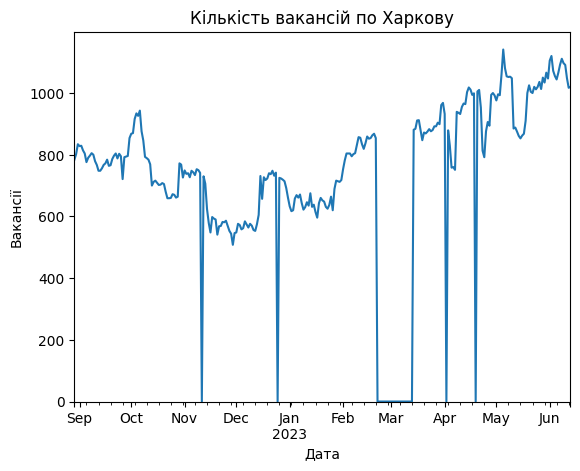

In [201]:
df["Вакансії"].plot()
plt.title("Кількість вакансій по Харкову")
plt.xlabel('Дата')
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()

In [202]:
df["Вакансії"] = df['Вакансії'].replace(0, np.nan)
df['Вакансії'] = df["Вакансії"].interpolate()

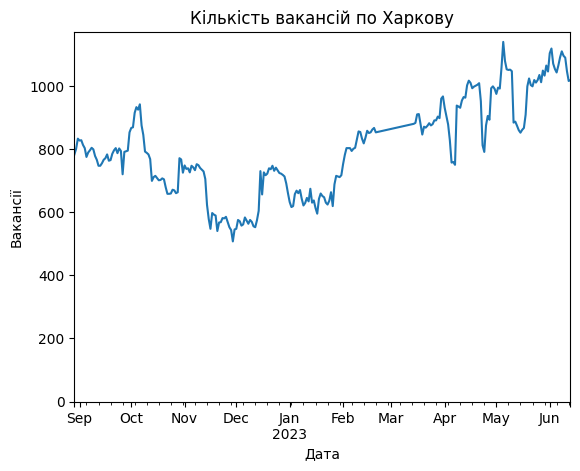

In [203]:
df["Вакансії"].plot()
plt.title("Кількість вакансій по Харкову")
plt.xlabel('Дата')
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()

In [204]:

df['rolling mean'] = df['Вакансії'].rolling(window=7).mean()

In [205]:
df

,Вакансії,rolling mean
Дата,,
2022-08-29,784.0,NaN
2022-08-30,802.0,NaN
2022-08-31,834.0,NaN
2022-09-01,828.0,NaN
2022-09-02,829.0,NaN
...,...,...
2023-06-09,1097.0,1076.714286
2023-06-10,1091.0,1079.428571
2023-06-11,1048.0,1078.428571


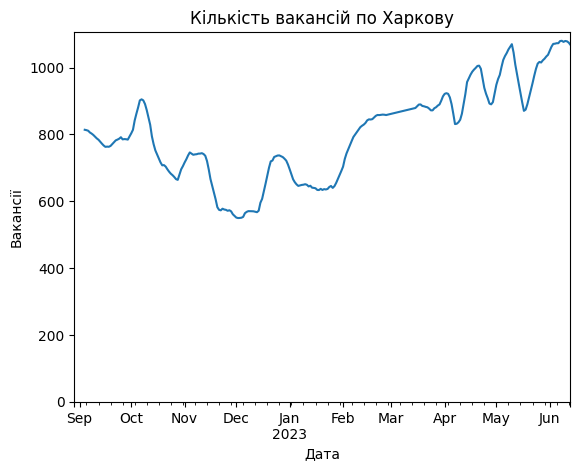

In [206]:
df["rolling mean"].plot()
plt.title("Кількість вакансій по Харкову")
plt.xlabel('Дата')
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()

In [207]:
df.describe()

,Вакансії,rolling mean
count,289.000000,283.000000
mean,804.799308,802.184755
std,146.413324,141.456787
min,508.000000,549.285714
25%,705.000000,692.750000
50%,800.000000,802.142857
75%,885.000000,889.785714
max,1141.000000,1080.000000


Друга частина

In [208]:
response = requests.get("https://uadata.net/work-positions/cities.json?о=Тернопіль")
data_json = response.json()

In [209]:
df_ternop = pd.DataFrame(data_json['data'])

In [210]:
df_ternop.head

<bound method NDFrame.head of              at    val
0    2022-05-23  31876
1    2022-05-24  31626
2    2022-05-25  31928
3    2022-05-26  34621
4    2022-05-27  35312
..          ...    ...
382  2023-06-09  31507
383  2023-06-10  31335
384  2023-06-11  29922
385  2023-06-12  29208
386  2023-06-13  29099

[387 rows x 2 columns]>

In [211]:
df_ternop["at"] = pd.to_datetime(df_ternop["at"])

In [212]:
df_ternop = df_ternop.rename(columns = {"at": "Дата", "val": "Вакансії"})

In [213]:
df_ternop.set_index('Дата', inplace=True)
df_ternop["Вакансії"] = df_ternop['Вакансії'].replace(0, np.nan)
df_ternop['Вакансії'] = df_ternop["Вакансії"].interpolate()
df_ternop['rolling mean'] = df_ternop['Вакансії'].rolling(window=7).mean()

In [214]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Дніпро")
data_json = response.json()

In [215]:
df_dnip = pd.DataFrame(data_json['data'])

In [216]:
df_dnip.head()

,at,val
0,2022-05-23,702
1,2022-05-24,726
2,2022-05-25,715
3,2022-05-26,742
4,2022-05-27,768


In [217]:
df_dnip["at"] = pd.to_datetime(df_dnip["at"])
df_dnip = df_dnip.rename(columns = {"at": "Дата", "val": "Вакансії"})
df_dnip.set_index('Дата', inplace=True)
df_dnip["Вакансії"] = df_dnip['Вакансії'].replace(0, np.nan)
df_dnip['Вакансії'] = df_dnip["Вакансії"].interpolate()
df_dnip['rolling mean'] = df_dnip['Вакансії'].rolling(window=7).mean()

In [218]:
df_dnip

,Вакансії,rolling mean
Дата,,
2022-05-23,702.0,NaN
2022-05-24,726.0,NaN
2022-05-25,715.0,NaN
2022-05-26,742.0,NaN
2022-05-27,768.0,NaN
...,...,...
2023-06-09,1108.0,1093.857143
2023-06-10,1097.0,1091.714286
2023-06-11,1042.0,1087.285714


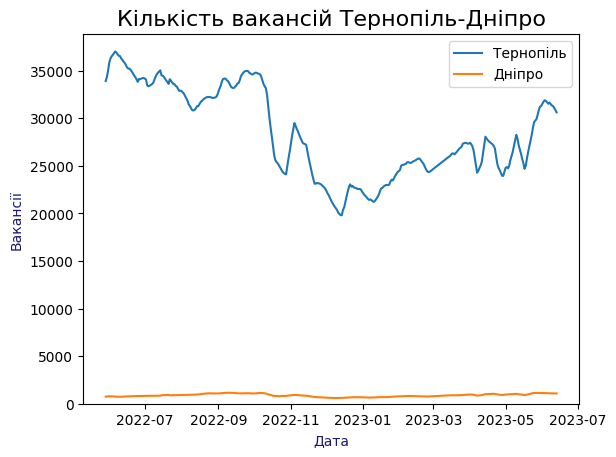

In [219]:
fig, axs = plt.subplots()
axs.plot(df_ternop.index, df_ternop['rolling mean'], label="Тернопіль")
axs.plot(df_dnip.index, df_dnip['rolling mean'], label="Дніпро")

plt.title("Кількість вакансій Тернопіль-Дніпро", fontsize=16)
plt.xlabel('Дата', color='midnightblue')
plt.ylabel('Вакансії', color='midnightblue')
plt.ylim(bottom=0)
plt.legend()
plt.show()